In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [44]:
data=pd.read_csv(r'C:\Users\mamai\OneDrive\Desktop\Lux\1. Weather Data.csv')

In [45]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [46]:
data.tail()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [48]:
#getting number of records
data.shape[0]

8784

In [49]:
#finding the number of features
data.shape[1]

8

In [50]:
#checking for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [51]:
data_cleaned = data.dropna()  # Drop rows with missing values

In [52]:
data_cleaned.shape[0]

8784

In [53]:
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [54]:
duplicates = data.duplicated().sum()
duplicates

0

In [55]:
print(data.Weather.unique())

['Fog' 'Freezing Drizzle,Fog' 'Mostly Cloudy' 'Cloudy' 'Rain'
 'Rain Showers' 'Mainly Clear' 'Snow Showers' 'Snow' 'Clear'
 'Freezing Rain,Fog' 'Freezing Rain' 'Freezing Drizzle' 'Rain,Snow'
 'Moderate Snow' 'Freezing Drizzle,Snow' 'Freezing Rain,Snow Grains'
 'Snow,Blowing Snow' 'Freezing Fog' 'Haze' 'Rain,Fog' 'Drizzle,Fog'
 'Drizzle' 'Freezing Drizzle,Haze' 'Freezing Rain,Haze' 'Snow,Haze'
 'Snow,Fog' 'Snow,Ice Pellets' 'Rain,Haze' 'Thunderstorms,Rain'
 'Thunderstorms,Rain Showers' 'Thunderstorms,Heavy Rain Showers'
 'Thunderstorms,Rain Showers,Fog' 'Thunderstorms' 'Thunderstorms,Rain,Fog'
 'Thunderstorms,Moderate Rain Showers,Fog' 'Rain Showers,Fog'
 'Rain Showers,Snow Showers' 'Snow Pellets' 'Rain,Snow,Fog'
 'Moderate Rain,Fog' 'Freezing Rain,Ice Pellets,Fog'
 'Drizzle,Ice Pellets,Fog' 'Drizzle,Snow' 'Rain,Ice Pellets'
 'Drizzle,Snow,Fog' 'Rain,Snow Grains' 'Rain,Snow,Ice Pellets'
 'Snow Showers,Fog' 'Moderate Snow,Blowing Snow']


In [56]:
# Split the data by comma (",") and consider only the first element
# assuming the main weather condition is the first part before any comma
data['Weather'] = data['Weather'].str.split(',').str.get(0)


In [57]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain', 'Moderate Snow', 'Freezing Fog', 'Haze',
       'Drizzle', 'Thunderstorms', 'Snow Pellets', 'Moderate Rain'],
      dtype=object)

In [58]:
# Statistical summary
stats_summary = data_cleaned.describe()
stats_summary


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [59]:
#the number of each occurence of a weather condition
data['Weather'].value_counts()

Weather
Mainly Clear        2106
Mostly Cloudy       2069
Cloudy              1728
Clear               1326
Snow                 457
Rain                 450
Rain Showers         191
Fog                  150
Drizzle              139
Snow Showers          64
Freezing Drizzle      27
Thunderstorms         27
Freezing Rain         22
Haze                  16
Moderate Snow          6
Freezing Fog           4
Snow Pellets           1
Moderate Rain          1
Name: count, dtype: int64

In [60]:
# Print the exact column names in the DataFrame
print(data_cleaned.columns.tolist())

['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather']


In [61]:
# Removing non numerical columns
data_cleaned = data_cleaned.drop(['Weather','Date/Time'], axis=1)

In [62]:
# Calculate Z-scores for each numerical column to identify outliers
z_scores = np.abs((data_cleaned - data_cleaned.mean()) / data_cleaned.std())
outliers = (z_scores > 3).sum()
print("Outliers per column:\n", outliers)

Outliers per column:
 Temp_C               0
Dew Point Temp_C     0
Rel Hum_%            0
Wind Speed_km/h     71
Visibility_km        0
Press_kPa           61
dtype: int64


In [63]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Date/Time', 'Weather'], dtype='object')
Numerical Variables:
['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']


Temp_C
Skew : -0.18


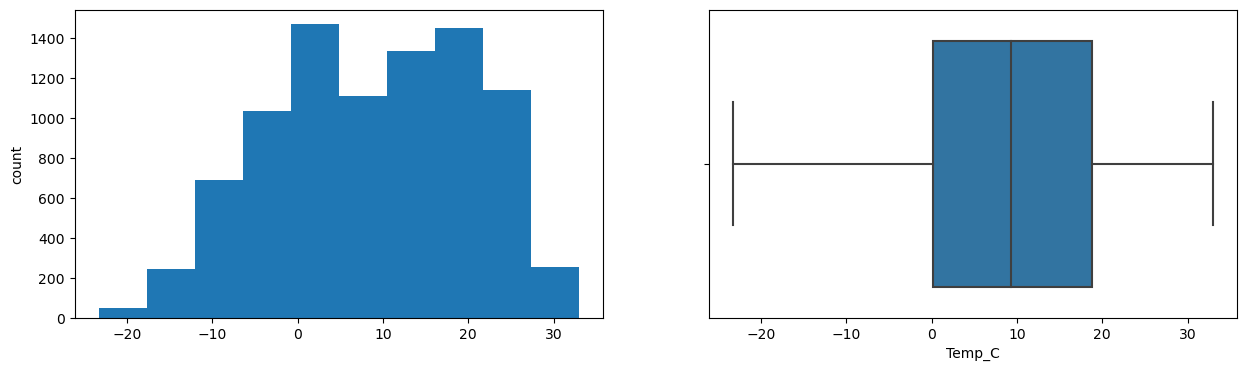

Dew Point Temp_C
Skew : -0.32


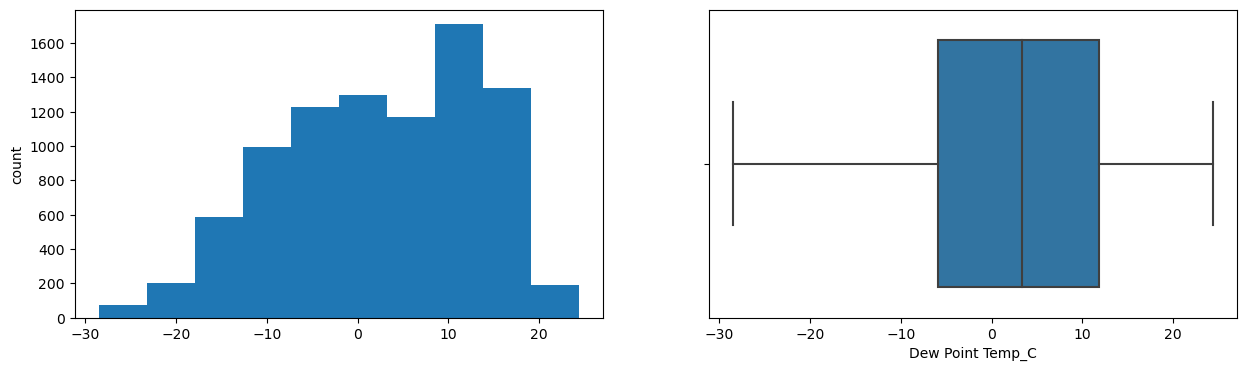

Rel Hum_%
Skew : -0.32


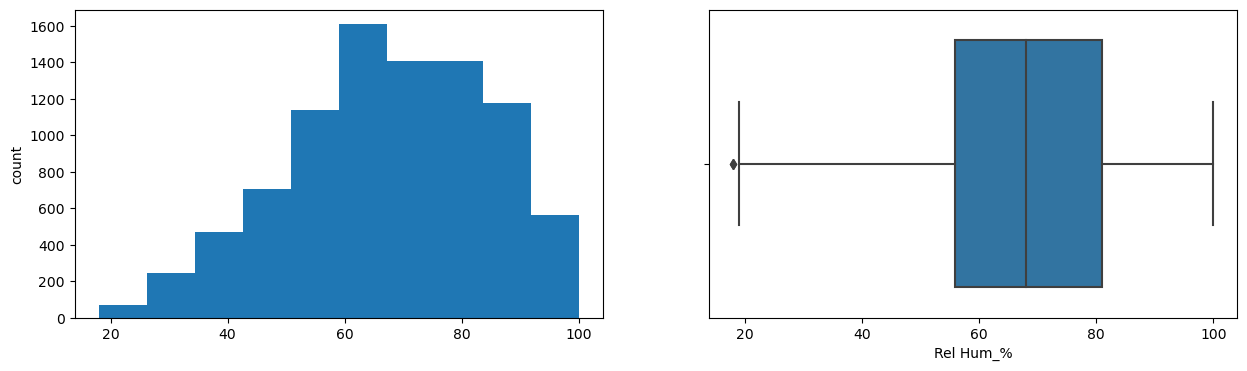

Wind Speed_km/h
Skew : 0.87


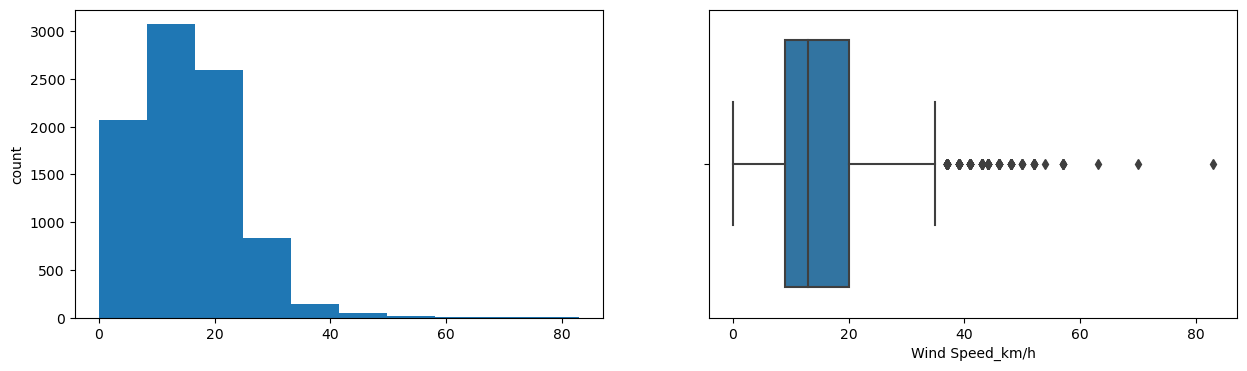

Visibility_km
Skew : 0.41


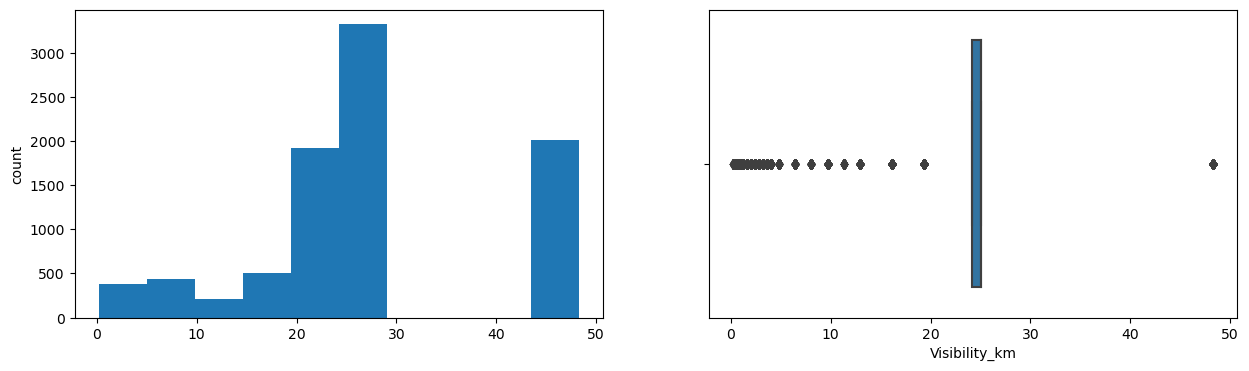

Press_kPa
Skew : -0.23


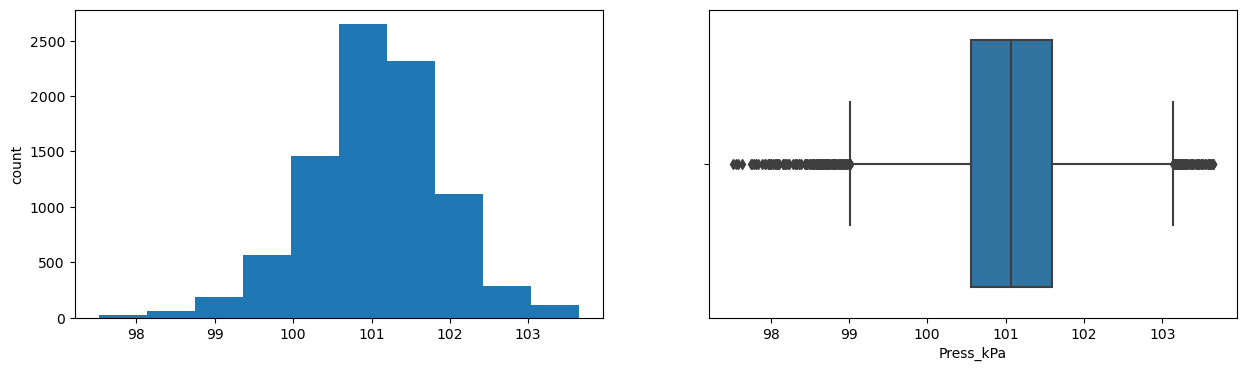

In [64]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

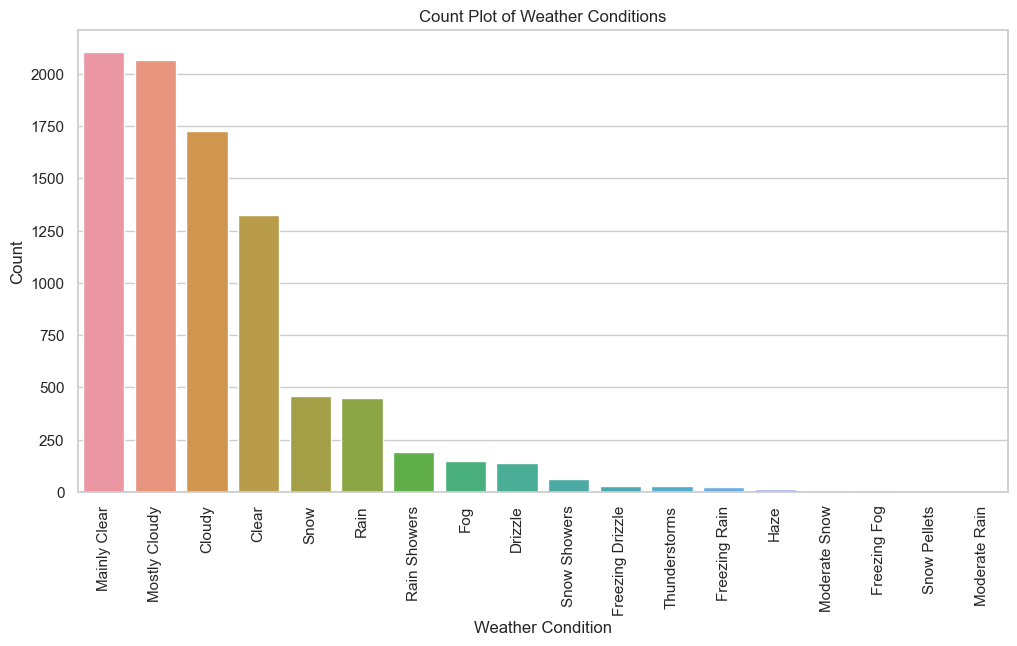

In [68]:
sns.set(style="whitegrid")

# Count plot for the 'Weather' column
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather', data=data, order=data['Weather'].value_counts().index)

plt.xticks(rotation=90)

# Set plot title and labels
plt.title('Count Plot of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')

# Show the plot
plt.show()


In [65]:
corr_matrix = data_cleaned.corr()
corr_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


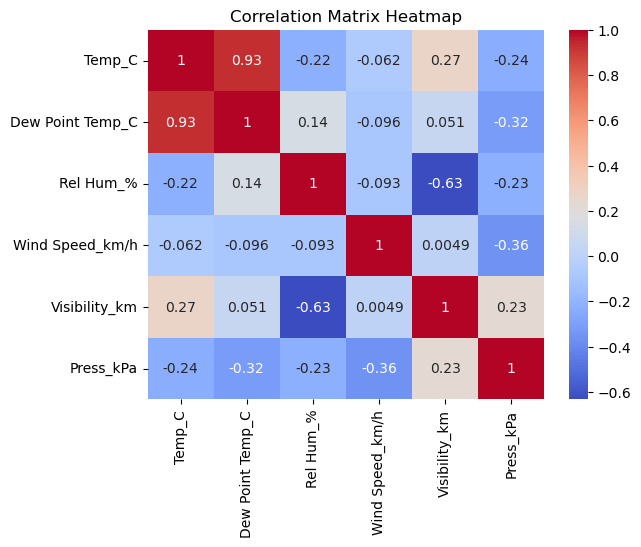

In [66]:
# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()